## Import Necessary Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer


## Load Data 

In [2]:
fraud_data = pd.read_csv('../data/Fraud_Data.csv')
ip_data = pd.read_csv('../data/IpAddress_to_Country.csv')
credit_data = pd.read_csv('../data/creditcard.csv')

## Overview of the Data

### fraudulent activities data set

In [3]:
fraud_data.head()

user_id          signup_time        purchase_time  purchase_value  \
0    22058  2015-02-24 22:55:49  2015-04-18 02:47:11              34   
1   333320  2015-06-07 20:39:50  2015-06-08 01:38:54              16   
2     1359  2015-01-01 18:52:44  2015-01-01 18:52:45              15   
3   150084  2015-04-28 21:13:25  2015-05-04 13:54:50              44   
4   221365  2015-07-21 07:09:52  2015-09-09 18:40:53              39   

       device_id source browser sex  age    ip_address  class  
0  QVPSPJUOCKZAR    SEO  Chrome   M   39  7.327584e+08      0  
1  EOGFQPIZPYXFZ    Ads  Chrome   F   53  3.503114e+08      0  
2  YSSKYOSJHPPLJ    SEO   Opera   M   53  2.621474e+09      1  
3  ATGTXKYKUDUQN    SEO  Safari   M   41  3.840542e+09      0  
4  NAUITBZFJKHWW    Ads  Safari   M   45  4.155831e+08      0

### IP addresses to countries data set

In [4]:
ip_data.head()

lower_bound_ip_address  upper_bound_ip_address    country
0              16777216.0                16777471  Australia
1              16777472.0                16777727      China
2              16777728.0                16778239      China
3              16778240.0                16779263  Australia
4              16779264.0                16781311      China

In [5]:
credit_data.head()

Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28  Amount  Class  
0 -0.189115  0.133558 -0.021053  149.62      0  
1  0.125895 -0.008983  0.014724    2.69      0  
2 -0.139097 -0.055353 -0.059752  378.66      0  
3 -0.221929  0.062723  0.061458  123.50      0  
4  0.502292  0.219422  0.215153   69.99      0  

[5 rows x 31 columns]

## Handle Missing Values

In [6]:
# Display information about each dataset
print("Fraud Data Info:")
fraud_data.info()


print("\nIP Data Info:")
ip_data.info()



Fraud Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151112 entries, 0 to 151111
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   user_id         151112 non-null  int64  
 1   signup_time     151112 non-null  object 
 2   purchase_time   151112 non-null  object 
 3   purchase_value  151112 non-null  int64  
 4   device_id       151112 non-null  object 
 5   source          151112 non-null  object 
 6   browser         151112 non-null  object 
 7   sex             151112 non-null  object 
 8   age             151112 non-null  int64  
 9   ip_address      151112 non-null  float64
 10  class           151112 non-null  int64  
dtypes: float64(1), int64(4), object(6)
memory usage: 12.7+ MB

IP Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138846 entries, 0 to 138845
Data columns (total 3 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  ---

In [7]:
print("\nCredit Data Info:")
credit_data.info()



Credit Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  floa

In [8]:
# Check for missing values in fraud_data
print("Check for missing values in fraud_data")
print(fraud_data.isnull().sum())

# Check credit_data missing values
print("Check for missing values in credit_data")
print(credit_data.isnull().sum())

# Check ip_address missing values
print("Check for missing values inip_address data")
print(ip_data.isnull().sum())


Check for missing values in fraud_data
user_id           0
signup_time       0
purchase_time     0
purchase_value    0
device_id         0
source            0
browser           0
sex               0
age               0
ip_address        0
class             0
dtype: int64
Check for missing values in credit_data
Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64
Check for missing values inip_address data
lower_bound_ip_address    0
upper_bound_ip_address    0
country                   0
dtype: int64


There  is no Missing value

## Data Cleaning

### Duplicate Vaues

In [9]:
# Remove duplicates in place
fraud_data.drop_duplicates(inplace=True)
credit_data.drop_duplicates(inplace=True)
ip_data.drop_duplicates(inplace=True)

# Confirm if duplicates are removed
print(f"Remaining duplicates in fraud_data: {fraud_data.duplicated().sum()}")
print(f"Remaining duplicates in credit_data: {credit_data.duplicated().sum()}")
print(f"Remaining duplicates in ip_data: {ip_data.duplicated().sum()}")


Remaining duplicates in fraud_data: 0
Remaining duplicates in credit_data: 0
Remaining duplicates in ip_data: 0


In [10]:
# Convert time-related columns to datetime format  
fraud_data["signup_time"] = pd.to_datetime(fraud_data["signup_time"])  
fraud_data["purchase_time"] = pd.to_datetime(fraud_data["purchase_time"])  

# Set categorical columns to appropriate data types  
fraud_data["source"] = fraud_data["source"].astype("category")  
fraud_data["browser"] = fraud_data["browser"].astype("category")  
fraud_data["sex"] = fraud_data["sex"].astype("category")  

# Display dataset summary to verify data types
print(fraud_data.dtypes)


user_id                    int64
signup_time       datetime64[ns]
purchase_time     datetime64[ns]
purchase_value             int64
device_id                 object
source                  category
browser                 category
sex                     category
age                        int64
ip_address               float64
class                      int64
dtype: object


## Exploratory Data Analysis

### Univariant Analysis

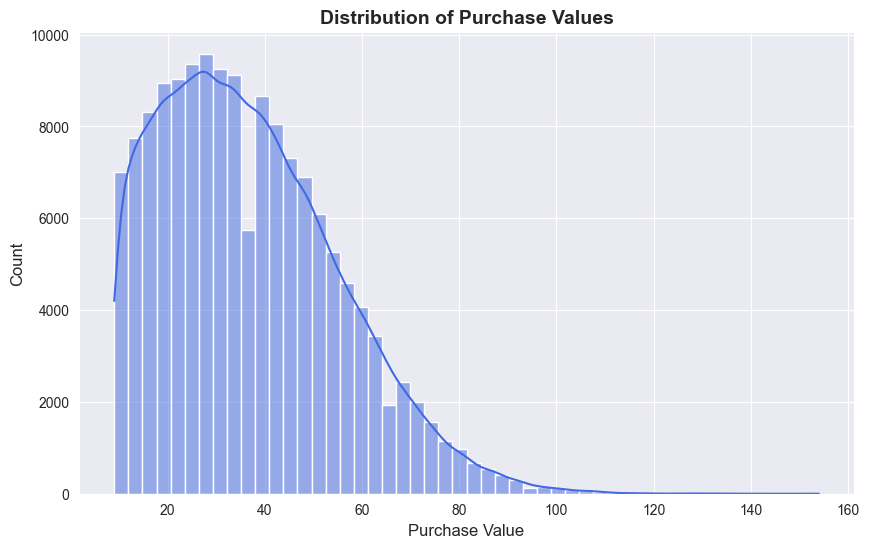

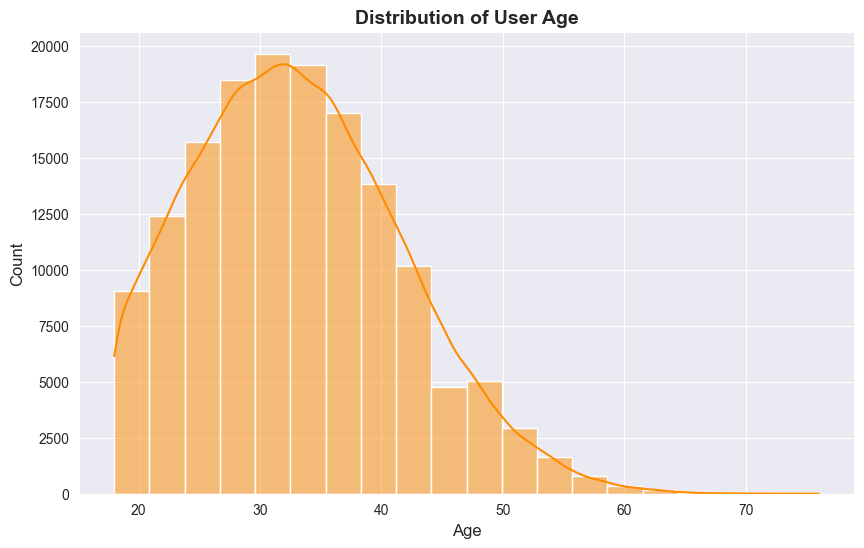

C:\Users\hp\AppData\Local\Temp\ipykernel_20024\304180555.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="class", data=fraud_data, palette=["limegreen", "crimson"])


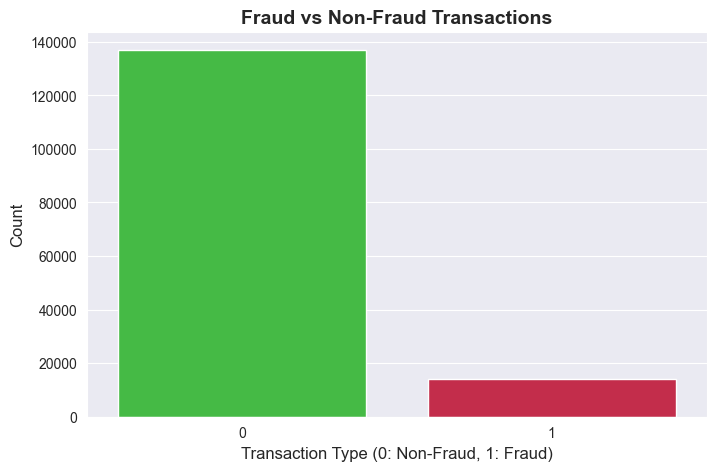

In [11]:
# Set a modern style
sns.set_style("darkgrid")

# Distribution of purchase values with new colors
plt.figure(figsize=(10, 6))
sns.histplot(fraud_data["purchase_value"], bins=50, kde=True, color="royalblue")
plt.title("Distribution of Purchase Values", fontsize=14, fontweight="bold")
plt.xlabel("Purchase Value", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.show()

# Distribution of user age with a new color
plt.figure(figsize=(10, 6))
sns.histplot(fraud_data["age"], bins=20, kde=True, color="darkorange")
plt.title("Distribution of User Age", fontsize=14, fontweight="bold")
plt.xlabel("Age", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.show()

# Countplot for fraud detection with new color palette
plt.figure(figsize=(8, 5))
sns.countplot(x="class", data=fraud_data, palette=["limegreen", "crimson"])
plt.title("Fraud vs Non-Fraud Transactions", fontsize=14, fontweight="bold")
plt.xlabel("Transaction Type (0: Non-Fraud, 1: Fraud)", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.show()


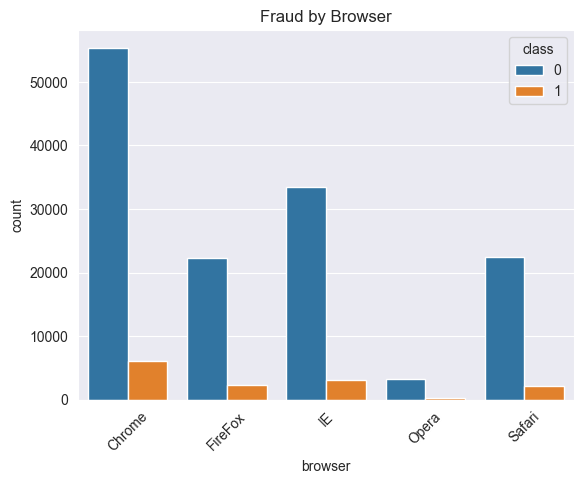

In [12]:
# Browser and fraud analysis
sns.countplot(x='browser', hue='class', data=fraud_data)
plt.title('Fraud by Browser')
plt.xticks(rotation=45)
plt.show()

Multivariant analysis

In [13]:
# Encode categorical variables using LabelEncoder
label_encoder = LabelEncoder()

fraud_data['source'] = label_encoder.fit_transform(fraud_data['source'])
fraud_data['browser'] = label_encoder.fit_transform(fraud_data['browser'])
fraud_data['sex'] = label_encoder.fit_transform(fraud_data['sex'])


# Check the dataset after encoding
fraud_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151112 entries, 0 to 151111
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   user_id         151112 non-null  int64         
 1   signup_time     151112 non-null  datetime64[ns]
 2   purchase_time   151112 non-null  datetime64[ns]
 3   purchase_value  151112 non-null  int64         
 4   device_id       151112 non-null  object        
 5   source          151112 non-null  int64         
 6   browser         151112 non-null  int64         
 7   sex             151112 non-null  int64         
 8   age             151112 non-null  int64         
 9   ip_address      151112 non-null  float64       
 10  class           151112 non-null  int64         
dtypes: datetime64[ns](2), float64(1), int64(7), object(1)
memory usage: 12.7+ MB


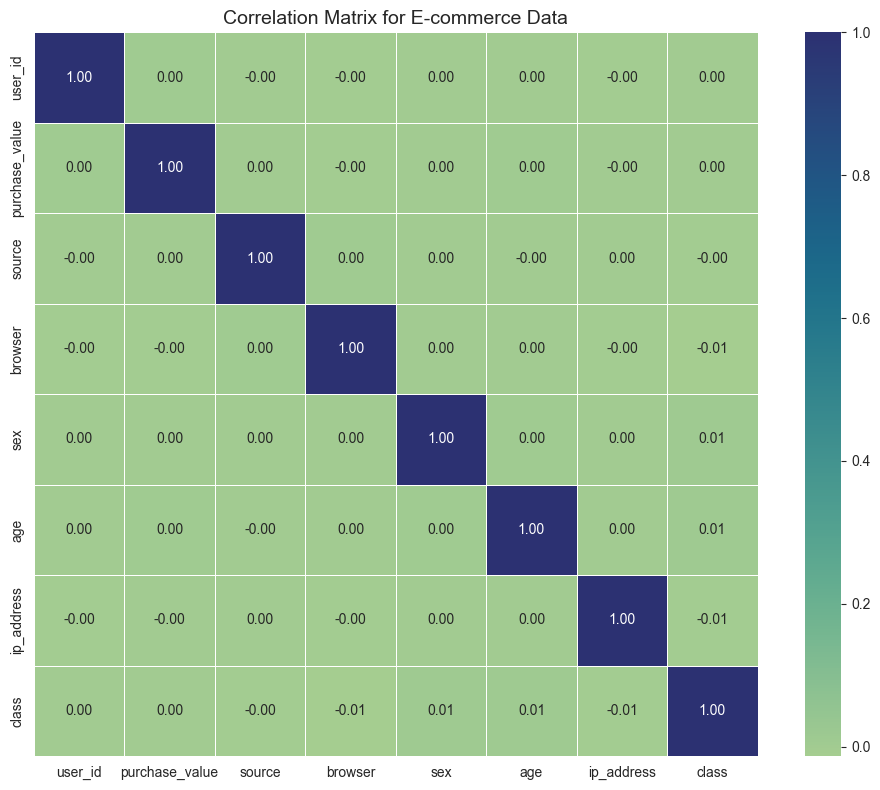

In [20]:
plt.figure(figsize=(10, 8))

sns.heatmap(fraud_data.drop(columns=['device_id', 'signup_time', 'purchase_time']).corr(),  
            annot=True, fmt=".2f", cmap='crest', linewidths=0.5, square=True)

plt.title('Correlation Matrix for E-commerce Data', fontsize=14)
plt.tight_layout()
plt.show()


### Outlier Detection

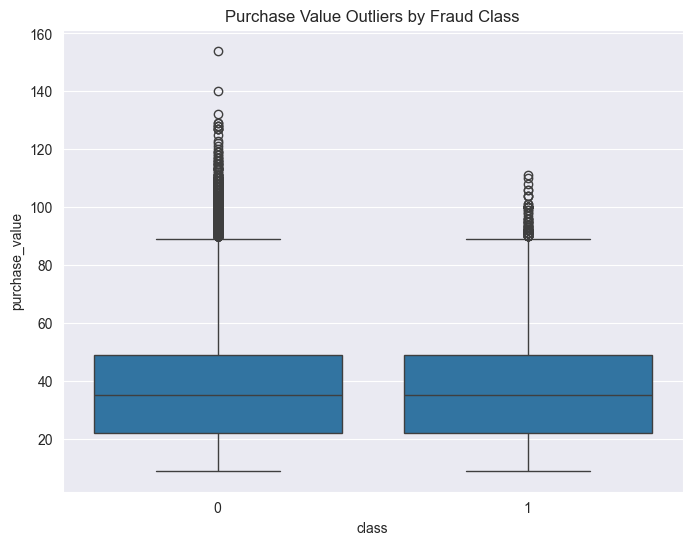

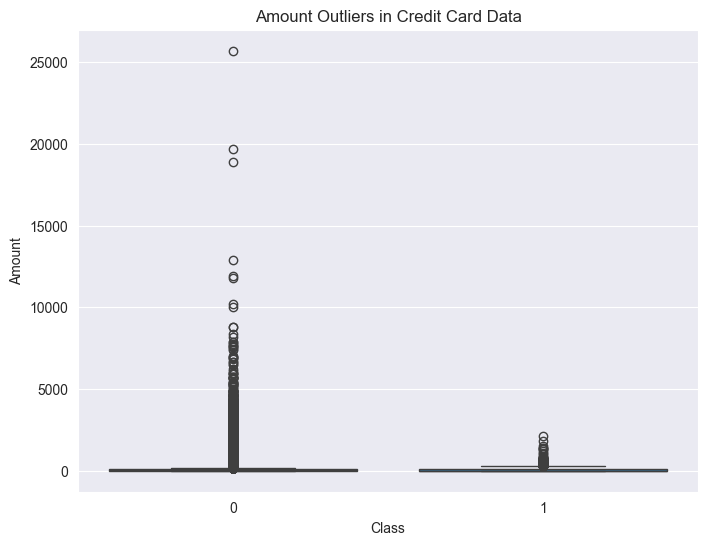

In [21]:
# Boxplot for detecting outliers in purchase_value
plt.figure(figsize=(8, 6))
sns.boxplot(data=fraud_data, x='class', y='purchase_value')
plt.title('Purchase Value Outliers by Fraud Class')
plt.show()

# Outlier detection in credit card data (Amount)
plt.figure(figsize=(8, 6))
sns.boxplot(data=credit_data, x='Class', y='Amount')
plt.title('Amount Outliers in Credit Card Data')
plt.show()

C:\Users\hp\AppData\Local\Temp\ipykernel_20024\2936358963.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='class', data=fraud_data, palette="Set2")


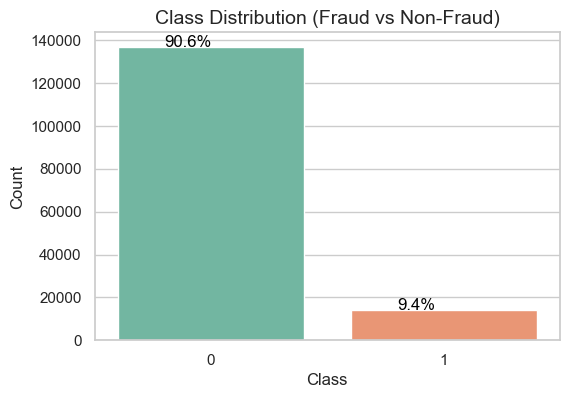

C:\Users\hp\AppData\Local\Temp\ipykernel_20024\2936358963.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='Class', data=credit_data, palette="Set2")


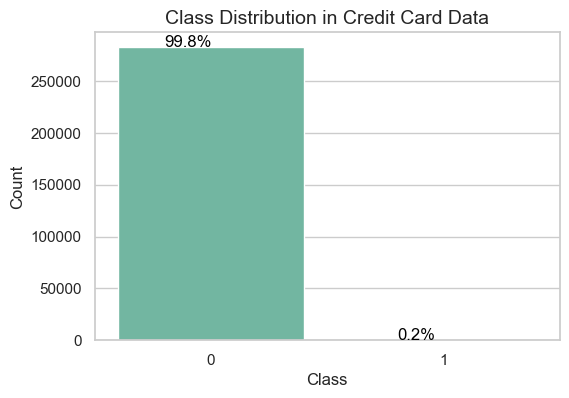

In [22]:
# Import necessary libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Set a professional-style theme
sns.set_theme(style="whitegrid")

# Class distribution in e-commerce data
plt.figure(figsize=(6, 4))
ax = sns.countplot(x='class', data=fraud_data, palette="Set2")

# Add percentage labels
total = len(fraud_data)
for p in ax.patches:
    percentage = f'{100 * p.get_height() / total:.1f}%'
    ax.annotate(percentage, (p.get_x() + 0.2, p.get_height() + 50), fontsize=12, color='black')

plt.title('Class Distribution (Fraud vs Non-Fraud)', fontsize=14)
plt.xlabel('Class', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.show()

# Class distribution in credit card data
plt.figure(figsize=(6, 4))
ax = sns.countplot(x='Class', data=credit_data, palette="Set2")

# Add percentage labels
total = len(credit_data)
for p in ax.patches:
    percentage = f'{100 * p.get_height() / total:.1f}%'
    ax.annotate(percentage, (p.get_x() + 0.2, p.get_height() + 50), fontsize=12, color='black')

plt.title('Class Distribution in Credit Card Data', fontsize=14)
plt.xlabel('Class', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.show()


### Merge Dataset

In [23]:
# Convert IP Address into Integer format
def convert_ip_to_int(ip_address):
    try:
        # Ensure IP address is a valid string before conversion
        if isinstance(ip_address, str):
            return int(ip_address.replace('.', ''))
        else:
            return None
    except Exception as e:
        print(f"Error converting IP address {ip_address}: {e}")
        return None

In [24]:
 # Ensure 'ip_address' is treated as a string to handle missing values
fraud_data['ip_address'] = fraud_data['ip_address'].astype(str)

# Convert IP addresses to integer format, handling errors
fraud_data['ip_address'] = fraud_data['ip_address'].apply(lambda x: convert_ip_to_int(x) if x != 'nan' else None)

In [25]:
fraud_data.head()

user_id         signup_time       purchase_time  purchase_value  \
0    22058 2015-02-24 22:55:49 2015-04-18 02:47:11              34   
1   333320 2015-06-07 20:39:50 2015-06-08 01:38:54              16   
2     1359 2015-01-01 18:52:44 2015-01-01 18:52:45              15   
3   150084 2015-04-28 21:13:25 2015-05-04 13:54:50              44   
4   221365 2015-07-21 07:09:52 2015-09-09 18:40:53              39   

       device_id  source  browser  sex  age       ip_address  class  
0  QVPSPJUOCKZAR       2        0    1   39   73275836879972      0  
1  EOGFQPIZPYXFZ       0        0    0   53  350311387865908      0  
2  YSSKYOSJHPPLJ       2        3    1   53  262147382011095      1  
3  ATGTXKYKUDUQN       2        4    1   41  384054244391396      0  
4  NAUITBZFJKHWW       0        4    1   45  415583117452712      0

In [26]:
# Ensure both 'lower_bound_ip_address' and 'upper_bound_ip_address' in ip_data are strings
ip_data['lower_bound_ip_address'] = ip_data['lower_bound_ip_address'].astype(str)
ip_data['upper_bound_ip_address'] = ip_data['upper_bound_ip_address'].astype(str)

# Convert the IP addresses in the IP-to-country dataset to integer format
ip_data['lower_bound_ip_addres'] = ip_data['lower_bound_ip_address'].apply(lambda x: convert_ip_to_int(x) if x != 'nan' else None)
ip_data['upper_bound_ip_adress'] = ip_data['upper_bound_ip_address'].apply(lambda x: convert_ip_to_int(x) if x != 'nan' else None)

In [27]:
ip_data = ip_data.iloc[:, 2:]
ip_data.head()

country  lower_bound_ip_addres  upper_bound_ip_adress
0  Australia              167772160               16777471
1      China              167774720               16777727
2      China              167777280               16778239
3  Australia              167782400               16779263
4      China              167792640               16781311

In [29]:
# Merge Fraud Dataset with IP Dataset

merged_df = pd.concat([fraud_data, ip_data], axis = 1)
merged_df.head()

user_id         signup_time       purchase_time  purchase_value  \
0    22058 2015-02-24 22:55:49 2015-04-18 02:47:11              34   
1   333320 2015-06-07 20:39:50 2015-06-08 01:38:54              16   
2     1359 2015-01-01 18:52:44 2015-01-01 18:52:45              15   
3   150084 2015-04-28 21:13:25 2015-05-04 13:54:50              44   
4   221365 2015-07-21 07:09:52 2015-09-09 18:40:53              39   

       device_id  source  browser  sex  age       ip_address  class  \
0  QVPSPJUOCKZAR       2        0    1   39   73275836879972      0   
1  EOGFQPIZPYXFZ       0        0    0   53  350311387865908      0   
2  YSSKYOSJHPPLJ       2        3    1   53  262147382011095      1   
3  ATGTXKYKUDUQN       2        4    1   41  384054244391396      0   
4  NAUITBZFJKHWW       0        4    1   45  415583117452712      0   

     country  lower_bound_ip_addres  upper_bound_ip_adress  
0  Australia            167772160.0             16777471.0  
1      China            167774720.0             16777727.0  
2      China            167777280.0             16778239.0  
3  Australia            167782400.0             16779263.0  
4      China            167792640.0             16781311.0

In [30]:
fraud_data.shape, ip_data.shape

((151112, 11), (138846, 3))

In [31]:
merged_df.isnull().sum()

user_id                      0
signup_time                  0
purchase_time                0
purchase_value               0
device_id                    0
source                       0
browser                      0
sex                          0
age                          0
ip_address                   0
class                        0
country                  12266
lower_bound_ip_addres    12266
upper_bound_ip_adress    12266
dtype: int64

In [32]:
fraud_data_combined = merged_df.dropna()

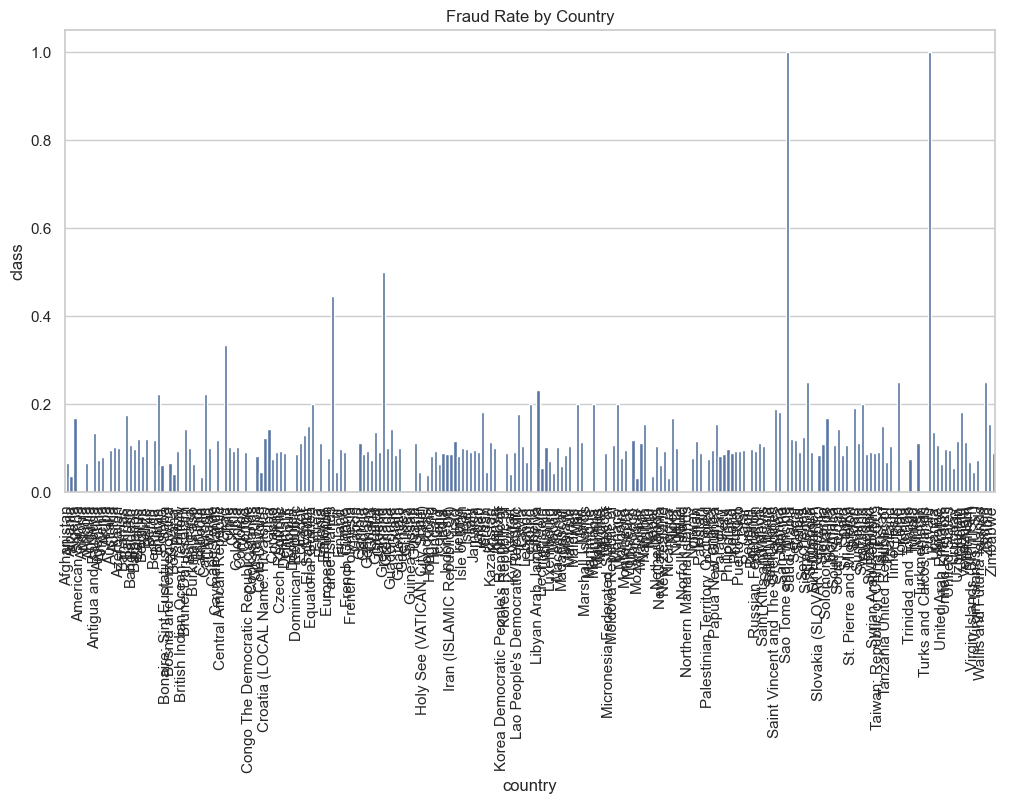

In [34]:
# Fraud Rate by country
# Barplot for transaction distribution by country
plt.figure(figsize=(12, 6))
country_fraud = fraud_data_combined.groupby('country')['class'].mean().reset_index()
sns.barplot(x='country', y='class', data=country_fraud)
plt.title('Fraud Rate by Country')
plt.xticks(rotation=90)
plt.show()

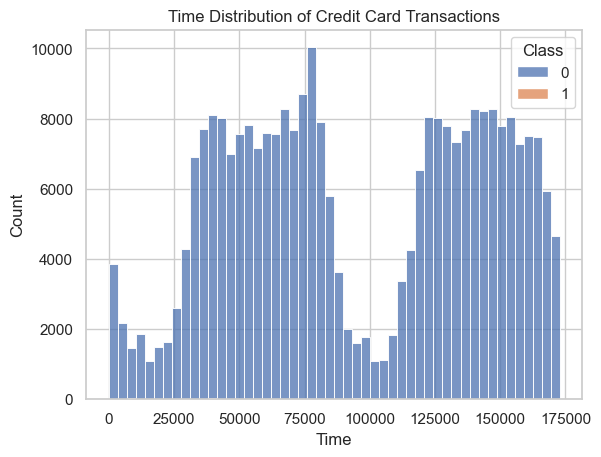

In [35]:
# Time analysis in credit card data
sns.histplot(credit_data, x='Time', hue='Class', multiple='stack', bins=50)
plt.title('Time Distribution of Credit Card Transactions')
plt.show()

## Feature Engineering

In [37]:
# Calculate transaction frequency and velocity
fraud_data_combined.loc[:, 'signup_purchase_diff'] = (fraud_data_combined['purchase_time'] - fraud_data_combined['signup_time']).dt.total_seconds()

# Calculate total transactions per user
fraud_data_combined.loc[:, 'transaction_count'] = fraud_data_combined.groupby('user_id')['user_id'].transform('count')


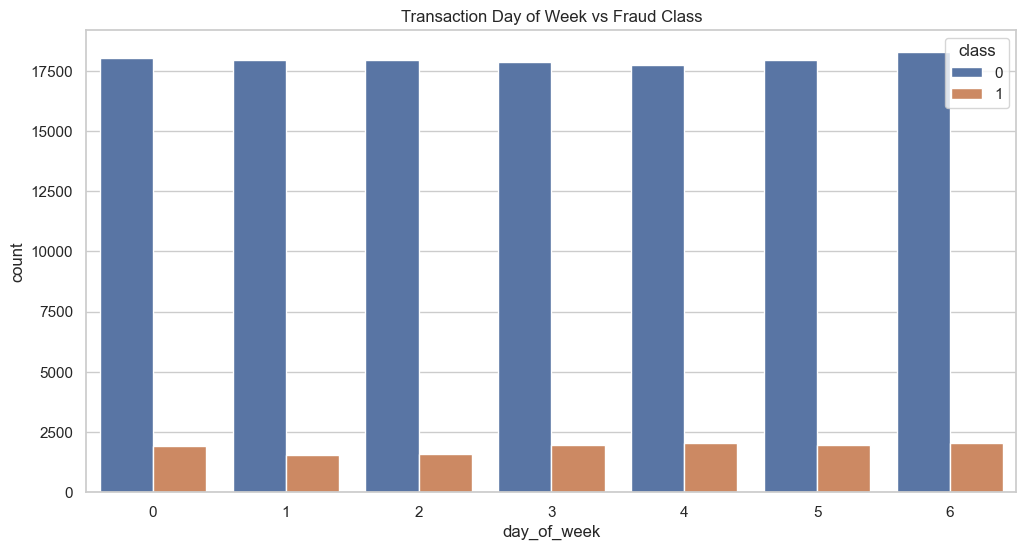

In [40]:
# Safely create a new column for day of the week
fraud_data_combined.loc[:, 'day_of_week'] = fraud_data_combined['purchase_time'].dt.dayofweek

# Plotting the transaction day of the week vs. fraud class
plt.figure(figsize=(12, 6))
sns.countplot(x='day_of_week', hue='class', data=fraud_data_combined)
plt.title('Transaction Day of Week vs Fraud Class')
plt.show()


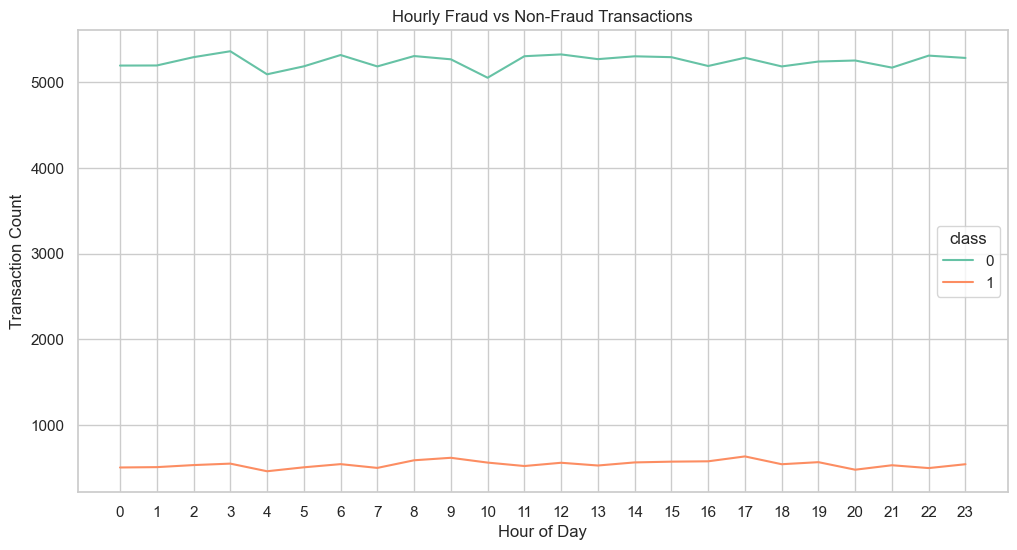

In [45]:
# Ensure 'hour_of_day' is extracted correctly
fraud_data_combined.loc[:, 'hour_of_day'] = fraud_data_combined['purchase_time'].dt.hour

plt.figure(figsize=(12, 6))

# Group by hour_of_day and class, calculate the transaction count
hourly_counts = fraud_data_combined.groupby(['hour_of_day', 'class']).size().reset_index(name='count')

# Line plot for fraud and non-fraud transactions by hour of day
sns.lineplot(x='hour_of_day', y='count', hue='class', data=hourly_counts, palette='Set2')

plt.title('Hourly Fraud vs Non-Fraud Transactions')
plt.xlabel('Hour of Day')
plt.ylabel('Transaction Count')
plt.xticks(range(0, 24))  # Ensure all hours from 0 to 23 are labeled
plt.show()


In [47]:
# Initialize the scaler
scaler = StandardScaler()

# Normalize the transaction amount and signup_purchase_diff safely using .loc
fraud_data_combined.loc[:, ['purchase_value', 'signup_purchase_diff']] = scaler.fit_transform(fraud_data_combined[['purchase_value', 'signup_purchase_diff']])


In [49]:


# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Use .loc to safely assign the encoded values
fraud_data_combined.loc[:, 'source'] = label_encoder.fit_transform(fraud_data_combined['source'])
fraud_data_combined.loc[:, 'browser'] = label_encoder.fit_transform(fraud_data_combined['browser'])
fraud_data_combined.loc[:, 'sex'] = label_encoder.fit_transform(fraud_data_combined['sex'])
fraud_data_combined.loc[:, 'country'] = label_encoder.fit_transform(fraud_data_combined['country'])

# Check the dataset after encoding
fraud_data_combined.head()


user_id         signup_time       purchase_time  purchase_value  \
0    22058 2015-02-24 22:55:49 2015-04-18 02:47:11       -0.159776   
1   333320 2015-06-07 20:39:50 2015-06-08 01:38:54       -1.142137   
2     1359 2015-01-01 18:52:44 2015-01-01 18:52:45       -1.196713   
3   150084 2015-04-28 21:13:25 2015-05-04 13:54:50        0.385981   
4   221365 2015-07-21 07:09:52 2015-09-09 18:40:53        0.113102   

       device_id  source  browser  sex  age       ip_address  class  country  \
0  QVPSPJUOCKZAR       2        0    1   39   73275836879972      0       11   
1  EOGFQPIZPYXFZ       0        0    0   53  350311387865908      0       42   
2  YSSKYOSJHPPLJ       2        3    1   53  262147382011095      1       42   
3  ATGTXKYKUDUQN       2        4    1   41  384054244391396      0       11   
4  NAUITBZFJKHWW       0        4    1   45  415583117452712      0       42   

   lower_bound_ip_addres  upper_bound_ip_adress  signup_purchase_diff  \
0            167772160.0             16777471.0             -0.136131   
1            167774720.0             16777727.0             -1.571694   
2            167777280.0             16778239.0             -1.577432   
3            167782400.0             16779263.0             -1.420057   
4            167792640.0             16781311.0             -0.182575   

   transaction_count  day_of_week  hour_of_day  
0                  1            5            2  
1                  1            0            1  
2                  1            3           18  
3                  1            0           13  
4                  1            2           18

In [50]:
fraud_data_combined.info()

<class 'pandas.core.frame.DataFrame'>
Index: 138846 entries, 0 to 138845
Data columns (total 18 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   user_id                138846 non-null  int64         
 1   signup_time            138846 non-null  datetime64[ns]
 2   purchase_time          138846 non-null  datetime64[ns]
 3   purchase_value         138846 non-null  float64       
 4   device_id              138846 non-null  object        
 5   source                 138846 non-null  int64         
 6   browser                138846 non-null  int64         
 7   sex                    138846 non-null  int64         
 8   age                    138846 non-null  int64         
 9   ip_address             138846 non-null  int64         
 10  class                  138846 non-null  int64         
 11  country                138846 non-null  int64         
 12  lower_bound_ip_addres  138846 non-null  float64  

In [52]:
fraud_data_combined['device_id'].nunique()

127281

In [51]:
fraud_data_combined['country'].nunique()

235

In [ ]:
fraud_data_combined.to_csv('../data/cleaned_data_1.csv', index=False, encoding='utf-8')

In [54]:
credit_data.to_csv('../data/cleaned_data_2.csv', index=False, encoding='utf-8')